Análisis descriptivo

Los datos serán de las tablas:
        
1.- Population below poverty line
        
2.- Death Rate

3.- Hospital bed density

4.- Physicians density

5.- Life expectancy
 

In [2]:
import os
import pandas as pd
import requests
import matplotlib as plt

Lectura de tablas .csv

In [3]:
doctoresCA=pd.read_csv('doctoresCA.csv')
doctoresSA=pd.read_csv('doctoresSA.csv')
doctoresNA=pd.read_csv('doctoresNA.csv')

In [4]:
mortalidadNA=pd.read_csv('mortalidadNA.csv')
mortalidadSA=pd.read_csv('mortalidadSA.csv')
mortalidadCA=pd.read_csv('mortalidadCA.csv')

In [5]:
esperanzaCA=pd.read_csv('esperanzaCA.csv')
esperanzaSA=pd.read_csv('esperanzaSA.csv')
esperanzaNA=pd.read_csv('esperanzaNA.csv')

In [6]:
pobrezaCA=pd.read_csv('pobrezaCA.csv')
pobrezaSA=pd.read_csv('pobrezaSA.csv')
pobrezaNA=pd.read_csv('pobrezaNA.csv')

In [7]:
camasNA=pd.read_csv('camasNA.csv')
camasSA=pd.read_csv('camasSA.csv')
camasCA=pd.read_csv('camasCA.csv')

Unión de tablas

In [8]:
doctores=pd.concat([doctoresNA, doctoresSA, doctoresCA], ignore_index=True)

In [9]:
doctores = doctores.drop([16, 17])

In [10]:
esperanza = pd.concat([esperanzaNA, esperanzaSA, esperanzaCA], ignore_index=True)

In [11]:
mortalidad = pd.concat([mortalidadNA, mortalidadSA, mortalidadCA], ignore_index=True)

In [12]:
camas = pd.concat([camasNA, camasSA, camasCA], ignore_index=True)

In [13]:
camas = camas.drop([15, 23])

In [14]:
pobreza = pd.concat([pobrezaNA, pobrezaSA, pobrezaCA], ignore_index=True)

Ordenando tablas por orden alfabetico en los países

In [15]:
esperanza = esperanza.sort_values(by=['Country'], ignore_index=True)

In [16]:
pobreza = pobreza.sort_values(by=['Country'], ignore_index=True)

In [17]:
doctores = doctores.sort_values(by=['Country'], ignore_index=True)

In [18]:
camas = camas.sort_values(by=['Country'], ignore_index=True)

In [19]:
mortalidad = mortalidad.sort_values(by=['Country'], ignore_index=True)

Unión de todas las tablas

In [20]:
datos = pd.merge(doctores, camas, on='Country')

In [21]:
datos = pd.merge(datos, esperanza, on='Country')

In [22]:
datos2 = pd.merge(mortalidad, pobreza, on='Country') 

In [23]:
datos = pd.merge(datos, datos2, on='Country')

tabla final

In [24]:
datos

,Country,"Physicians density (physicians/1,000 population)",Year_x_x,"Hospital bed density (beds/1,000 population)",Year_y_x,Life expectancy at birth (years),Year,"Death rate (deaths/1,000 population)",Year_x_y,Population below poverty line (%),Year_y_y
0,Argentina,4,2017,5,2014,78,2018,8,2018,26,2019
1,Belize,1,2017,1,2014,75,2018,4,2018,41,2019
2,Bolivia,2,2016,1,2014,70,2018,6,2018,39,2019
3,Brazil,2,2018,2,2014,74,2018,7,2018,4,2019
4,Canada,3,2017,3,2012,82,2018,9,2018,9,2019
5,Chile,1,2016,2,2013,79,2018,6,2018,14,2019
6,Colombia,2,2017,2,2014,76,2018,6,2018,28,2019
7,Costa Rica,1,2013,1,2014,79,2018,5,2018,22,2019
8,Dominica,1,2017,4,2010,77,2018,8,2018,29,2019
9,Dominican Republic,2,2017,2,2014,71,2018,6,2018,31,2019


En la tabla se observa que la esperanza de vida y la tasa de mortalidad fueron tomados el año 2018 y en la población debajo de una línea de pobreza (de acuerdo a cada país) fue tomada en 2019, el resto de datos varia en los años que fueron tomados. Hay que tener cuidado con el análisis de la densidad de doctores y camas de hospital.

el promedio de nuestros valores

In [25]:
print('en un rango de los años 2013-2018 la densidad de doctores por 1000 habitantes es en los países de nuestra tabla:')
datos['Physicians density (physicians/1,000 population)'].mean()

en un rango de los años 2013-2018 la densidad de doctores por 1000 habitantes es en los países de nuestra tabla:


1.6785714285714286

In [26]:
print('en un rango de los años 2010-2014 la densidad de camas de hospital por 1000 habitantes es:')
datos['Hospital bed density (beds/1,000 population)'].mean()

en un rango de los años 2010-2014 la densidad de camas de hospital por 1000 habitantes es:


2.3214285714285716

In [27]:
print('Para 2019 el porcentaje de población debajo de la línea de pobreza es:')
datos['Population below poverty line (%)'].mean()

Para 2019 el porcentaje de población debajo de la línea de pobreza es:


28.964285714285715

In [29]:
datos['Death rate (deaths/1,000 population)'].mean()

6.571428571428571

In [31]:
datos['Life expectancy at birth (years)'].mean()

74.92857142857143

La mediana

In [74]:
datos['Population below poverty line (%)'].median()

27.0

In [75]:
datos['Death rate (deaths/1,000 population)'].median()

6.0

In [76]:
datos['Physicians density (physicians/1,000 population)'].median()

1.5

In [77]:
datos['Hospital bed density (beds/1,000 population)'].median()

2.0

In [78]:
datos['Life expectancy at birth (years)'].median()

75.0

obteniendo los percentiles por defecto de la función describe

In [32]:
datos.describe()

,"Physicians density (physicians/1,000 population)",Year_x_x,"Hospital bed density (beds/1,000 population)",Year_y_x,Life expectancy at birth (years),Year,"Death rate (deaths/1,000 population)",Year_x_y,Population below poverty line (%),Year_y_y
count,28.000000,28.000000,28.000000,28.000000,28.000000,28.0,28.000000,28.0,28.000000,28.0
mean,1.678571,2016.714286,2.321429,2013.392857,74.928571,2018.0,6.571429,2018.0,28.964286,2019.0
std,1.156418,1.117442,1.540889,1.257254,3.731037,0.0,1.549876,0.0,15.614528,0.0
min,0.000000,2013.000000,1.000000,2010.000000,65.000000,2018.0,4.000000,2018.0,4.000000,2019.0
25%,1.000000,2016.000000,1.000000,2013.000000,73.000000,2018.0,5.000000,2018.0,19.250000,2019.0
50%,1.500000,2017.000000,2.000000,2014.000000,75.000000,2018.0,6.000000,2018.0,27.000000,2019.0
75%,2.000000,2017.250000,3.000000,2014.000000,78.000000,2018.0,8.000000,2018.0,35.750000,2019.0
max,5.000000,2018.000000,8.000000,2015.000000,82.000000,2018.0,9.000000,2018.0,70.000000,2019.0


¿La esperanza de vida es mayor en los países menos pobres de américa?

Obteniendo los países que tienen menor porcentaje de pobreza en la tabla paises_pobres

In [33]:
paises__= datos.nsmallest(10, ['Population below poverty line (%)']) 

In [34]:
paises__

,Country,"Physicians density (physicians/1,000 population)",Year_x_x,"Hospital bed density (beds/1,000 population)",Year_y_x,Life expectancy at birth (years),Year,"Death rate (deaths/1,000 population)",Year_x_y,Population below poverty line (%),Year_y_y
3,Brazil,2,2018,2,2014,74,2018,7,2018,4,2019
4,Canada,3,2017,3,2012,82,2018,9,2018,9,2019
27,Uruguay,5,2017,3,2014,78,2018,9,2018,10,2019
5,Chile,1,2016,2,2013,79,2018,6,2018,14,2019
26,United States,3,2016,3,2013,80,2018,8,2018,15,2019
12,Greenland,2,2016,8,2015,73,2018,9,2018,16,2019
18,Jamaica,1,2017,2,2013,75,2018,8,2018,17,2019
25,Trinidad and Tobago,3,2015,3,2014,73,2018,9,2018,20,2019
7,Costa Rica,1,2013,1,2014,79,2018,5,2018,22,2019
10,Ecuador,2,2016,2,2013,77,2018,5,2018,22,2019


Sacando un porcentaje considerando el 100% el valor de esperanza de vida de 82, que es el valor máximo, y teniendo en cuenta la media es alrededor de 74.93

In [35]:
porcentajes = paises__['Life expectancy at birth (years)']*(100/82)

In [36]:
porcentajes

3      90.243902
4     100.000000
27     95.121951
5      96.341463
26     97.560976
12     89.024390
18     91.463415
25     89.024390
7      96.341463
10     93.902439
Name: Life expectancy at birth (years), dtype: float64

Podemos decir con la muestra que la esperanza de vida es mayor en los países menos pobres 

<AxesSubplot:xlabel='Country'>

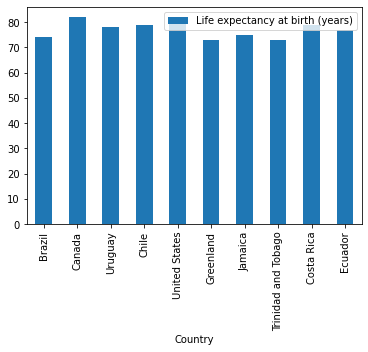

In [37]:
paises__.plot.bar(x='Country', y='Life expectancy at birth (years)')

¿Hay escasez de hospitales en América? (Relación densidad de médicos / densidad de camas de hospital)

En la base de datos se menciona que el valor de densidad de camas de hospital por 1000 habitantes es un valor no global, ya que depende de la demografía y la tasa de morbilidad por lo tanto no podemos decir acerca de la escasez de hospitales con esta muestra.

¿Es más pobre la zona centro de América que la zona sur?

Considerando las cinco posiciones de mayor pobreza de Centroamerica y Sudamerica tenemos:

In [38]:
pobrezaCA.nlargest(5, ['Population below poverty line (%)'])

,Country,Population below poverty line (%),Year
0,Guatemala,59,2019
1,Haiti,59,2019
2,Belize,41,2019
3,Grenada,38,2019
4,El Salvador,33,2019


In [39]:
pobrezaCA.nlargest(5, ['Population below poverty line (%)']).describe()

,Population below poverty line (%),Year
count,5.000000,5.0
mean,46.000000,2019.0
std,12.206556,0.0
min,33.000000,2019.0
25%,38.000000,2019.0
50%,41.000000,2019.0
75%,59.000000,2019.0
max,59.000000,2019.0


In [40]:
pobrezaSA.nlargest(5, ['Population below poverty line (%)']) 

,Country,Population below poverty line (%),Year
0,Suriname,70,2019
1,Bolivia,39,2019
2,Guyana,35,2019
3,Colombia,28,2019
4,Argentina,26,2019


In [41]:
pobrezaSA.nlargest(5, ['Population below poverty line (%)']).describe()

,Population below poverty line (%),Year
count,5.000000,5.0
mean,39.600000,2019.0
std,17.784825,0.0
min,26.000000,2019.0
25%,28.000000,2019.0
50%,35.000000,2019.0
75%,39.000000,2019.0
max,70.000000,2019.0


Con las cantidades percentiles y el promedio tenemos segun el indice que Centroamérica se considera más pobre entre centroamérica y sudamérica

¿Qué países tienen una tasa de densidad de médicos menor de 2.3?

Indicamos los valores menores a 2.3 de densidad de doctores

In [42]:
datos[(datos['Physicians density (physicians/1,000 population)'].le(2.3))]

,Country,"Physicians density (physicians/1,000 population)",Year_x_x,"Hospital bed density (beds/1,000 population)",Year_y_x,Life expectancy at birth (years),Year,"Death rate (deaths/1,000 population)",Year_x_y,Population below poverty line (%),Year_y_y
1,Belize,1,2017,1,2014,75,2018,4,2018,41,2019
2,Bolivia,2,2016,1,2014,70,2018,6,2018,39,2019
3,Brazil,2,2018,2,2014,74,2018,7,2018,4,2019
5,Chile,1,2016,2,2013,79,2018,6,2018,14,2019
6,Colombia,2,2017,2,2014,76,2018,6,2018,28,2019
7,Costa Rica,1,2013,1,2014,79,2018,5,2018,22,2019
8,Dominica,1,2017,4,2010,77,2018,8,2018,29,2019
9,Dominican Republic,2,2017,2,2014,71,2018,6,2018,31,2019
10,Ecuador,2,2016,2,2013,77,2018,5,2018,22,2019
11,El Salvador,2,2016,1,2014,75,2018,6,2018,33,2019


Obteniendo cantidades confiables de densidad de camas y pobreza ¿Qué países cuentan con menores cantidades? 

In [43]:
datos.nsmallest(10, ['Hospital bed density (beds/1,000 population)']) 

,Country,"Physicians density (physicians/1,000 population)",Year_x_x,"Hospital bed density (beds/1,000 population)",Year_y_x,Life expectancy at birth (years),Year,"Death rate (deaths/1,000 population)",Year_x_y,Population below poverty line (%),Year_y_y
1,Belize,1,2017,1,2014,75,2018,4,2018,41,2019
2,Bolivia,2,2016,1,2014,70,2018,6,2018,39,2019
7,Costa Rica,1,2013,1,2014,79,2018,5,2018,22,2019
11,El Salvador,2,2016,1,2014,75,2018,6,2018,33,2019
14,Guatemala,0,2018,1,2014,72,2018,5,2018,59,2019
16,Haiti,0,2018,1,2013,65,2018,8,2018,59,2019
17,Honduras,0,2017,1,2014,71,2018,5,2018,30,2019
20,Nicaragua,1,2018,1,2014,74,2018,5,2018,30,2019
22,Paraguay,1,2018,1,2011,78,2018,5,2018,22,2019
3,Brazil,2,2018,2,2014,74,2018,7,2018,4,2019


In [44]:
datos.nsmallest(10, ['Population below poverty line (%)']) 

,Country,"Physicians density (physicians/1,000 population)",Year_x_x,"Hospital bed density (beds/1,000 population)",Year_y_x,Life expectancy at birth (years),Year,"Death rate (deaths/1,000 population)",Year_x_y,Population below poverty line (%),Year_y_y
3,Brazil,2,2018,2,2014,74,2018,7,2018,4,2019
4,Canada,3,2017,3,2012,82,2018,9,2018,9,2019
27,Uruguay,5,2017,3,2014,78,2018,9,2018,10,2019
5,Chile,1,2016,2,2013,79,2018,6,2018,14,2019
26,United States,3,2016,3,2013,80,2018,8,2018,15,2019
12,Greenland,2,2016,8,2015,73,2018,9,2018,16,2019
18,Jamaica,1,2017,2,2013,75,2018,8,2018,17,2019
25,Trinidad and Tobago,3,2015,3,2014,73,2018,9,2018,20,2019
7,Costa Rica,1,2013,1,2014,79,2018,5,2018,22,2019
10,Ecuador,2,2016,2,2013,77,2018,5,2018,22,2019


Ningun país cumple el requisito de tener pocas camas de hospital y tener niveles de pobreza bajos

Reformulando la pregunta a ¿Que países cuentan con menores cantidades de densidad de camas y con mayores cantidades de pobreza?

In [45]:
datos.nlargest(10, ['Population below poverty line (%)']) 

,Country,"Physicians density (physicians/1,000 population)",Year_x_x,"Hospital bed density (beds/1,000 population)",Year_y_x,Life expectancy at birth (years),Year,"Death rate (deaths/1,000 population)",Year_x_y,Population below poverty line (%),Year_y_y
24,Suriname,1,2018,3,2010,73,2018,6,2018,70,2019
14,Guatemala,0,2018,1,2014,72,2018,5,2018,59,2019
16,Haiti,0,2018,1,2013,65,2018,8,2018,59,2019
19,Mexico,2,2016,2,2015,76,2018,5,2018,46,2019
1,Belize,1,2017,1,2014,75,2018,4,2018,41,2019
2,Bolivia,2,2016,1,2014,70,2018,6,2018,39,2019
13,Grenada,1,2017,4,2014,75,2018,8,2018,38,2019
15,Guyana,1,2018,2,2014,69,2018,7,2018,35,2019
11,El Salvador,2,2016,1,2014,75,2018,6,2018,33,2019
9,Dominican Republic,2,2017,2,2014,71,2018,6,2018,31,2019


Los países que cuentan con poca densidad de camas y gran pobreza son Belize, Bolivia, el Salvador, Guatemala y Haiti en un rango de 10 valores respectivamente

¿Qué porcentaje de países están por encima del promedio mundial? Respecto a la esperanza de vida

La esperanza de vida mundial es de 72 años, el porcentaje en este caso es:

In [81]:
(((datos['Life expectancy at birth (years)'].ge(72)*1).sum())/28)*100

82.14285714285714

¿Cuál región de América (sur, norte, centro) tienen una menor tasa de mortalidad?

Obteniendo un promedio de la mortalidad por regiones:

In [47]:
mortalidadNA['Death rate (deaths/1,000 population)'].mean()

7.75

In [48]:
mortalidadSA['Death rate (deaths/1,000 population)'].mean()

6.230769230769231

In [49]:
mortalidadCA['Death rate (deaths/1,000 population)'].mean()

6.818181818181818

Se tiene que en promedio por región Sudamérica tiene una tasa menor de mortalidad

Gráficas

En un rango de 2013-2018 se tiene que la densidad de doctores por 1000 personas 

<AxesSubplot:xlabel='Country'>

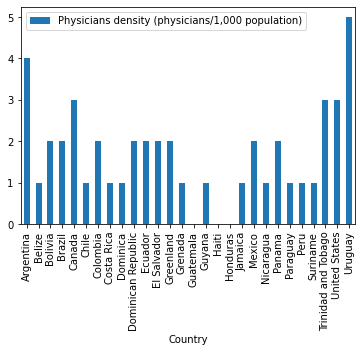

In [50]:
datos.plot.bar(x='Country', y='Physicians density (physicians/1,000 population)')

En un rango de 2010-2015 la densidad de camas de hospital

<AxesSubplot:xlabel='Country'>

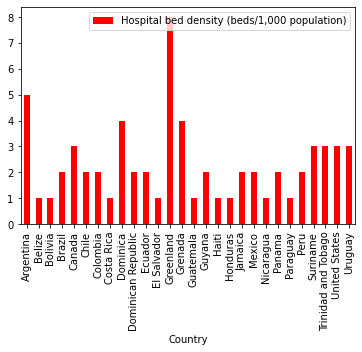

In [65]:
datos.plot.bar(x='Country', y='Hospital bed density (beds/1,000 population)', color={"red"})

<AxesSubplot:xlabel='Country'>

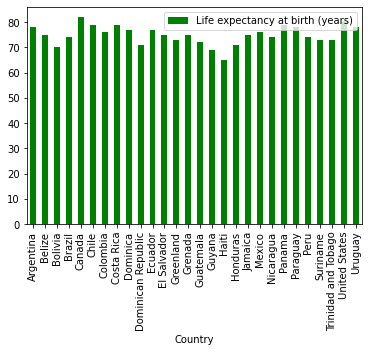

In [66]:
datos.plot.bar(x='Country', y='Life expectancy at birth (years)', color={'green'})

<AxesSubplot:xlabel='Country'>

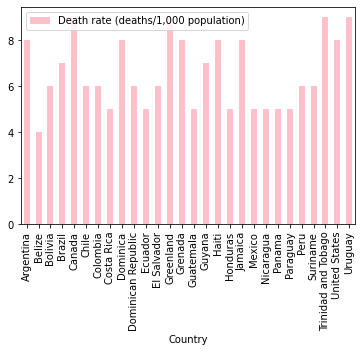

In [67]:
datos.plot.bar(x='Country', y='Death rate (deaths/1,000 population)', color={'pink'})

<AxesSubplot:xlabel='Country'>

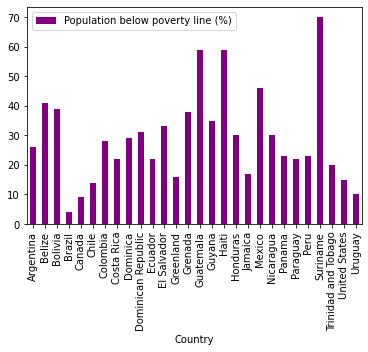

In [68]:
datos.plot.bar(x='Country', y='Population below poverty line (%)', color={'purple'})

Sin tener en cuenta países y años tenemos los histogramas:

<AxesSubplot:>

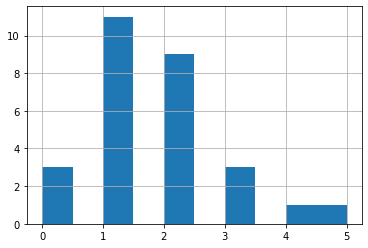

In [69]:
datos['Physicians density (physicians/1,000 population)'].hist()

<AxesSubplot:>

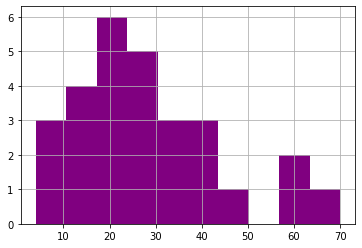

In [70]:
datos['Population below poverty line (%)'].hist(color='purple')

<AxesSubplot:>

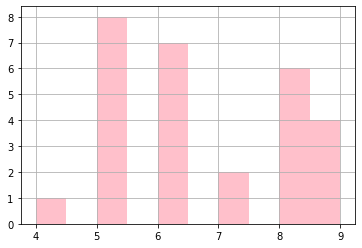

In [71]:
datos['Death rate (deaths/1,000 population)'].hist(color={'pink'})

<AxesSubplot:>

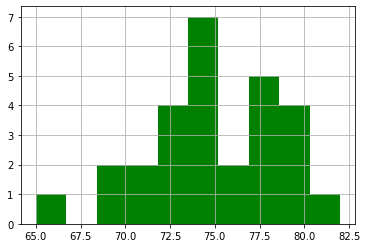

In [72]:
datos['Life expectancy at birth (years)'].hist(color={'green'})

<AxesSubplot:>

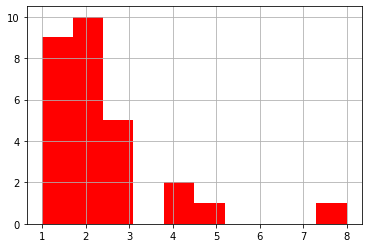

In [73]:
datos['Hospital bed density (beds/1,000 population)'].hist(color='red')